### Метод опорных векторов (kernels) [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def load_data(filename=None):
    #Начало вашего кода
    return pd.read_csv(filename).drop('Id', axis = 1)

    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1334,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1335,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1336,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

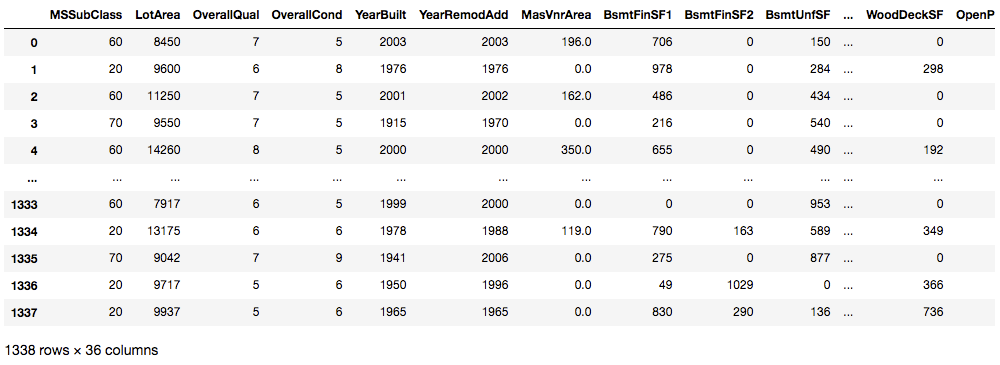

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [2]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indeces = np.arange(0,len(data))
    np.random.shuffle(indeces)
    val_ind = indeces[: round(ratio * len(indeces))]
    train_ind = indeces[round(ratio * len(indeces)):]
    val_data = data.loc[val_ind]
    train_data = data.loc[train_ind]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [3]:
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

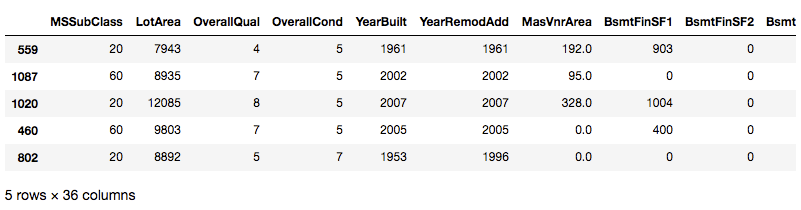

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

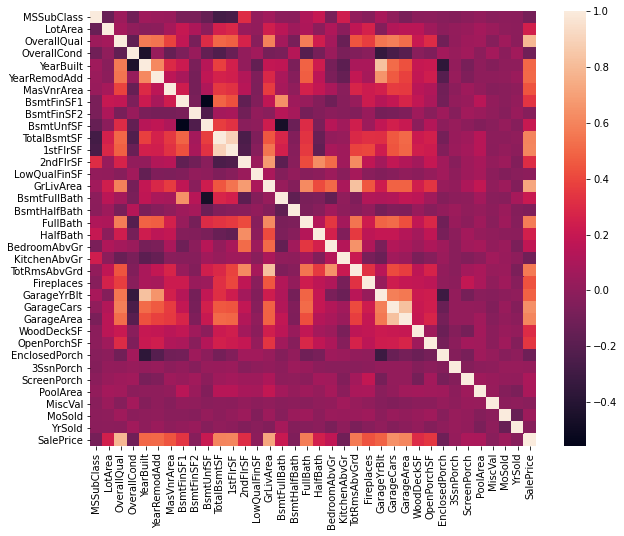

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода
plt.figure(figsize=(10,8))
sns.heatmap(splitted_data["train"].corr());
#Конец вашего кода

### Ожидаемые результаты:

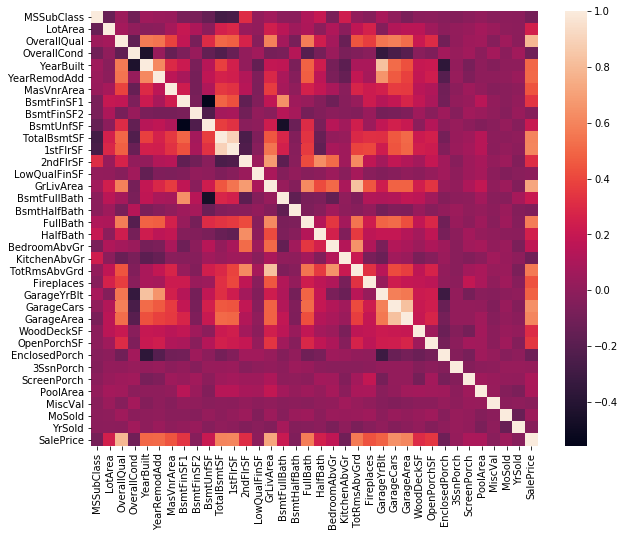

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

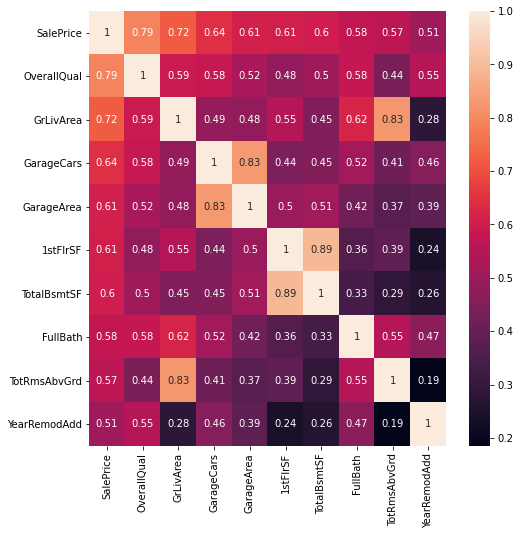

In [5]:
#Начало вашего кода 
plt.figure(figsize=(8,8))
most_corr = splitted_data["train"].corr()['SalePrice'].sort_values(ascending = False)[0:10].index
important = most_corr[1:]
sns.heatmap(splitted_data["train"][most_corr].corr(), annot = True);
#Конец вашего кода

### Ожидаемые результаты:


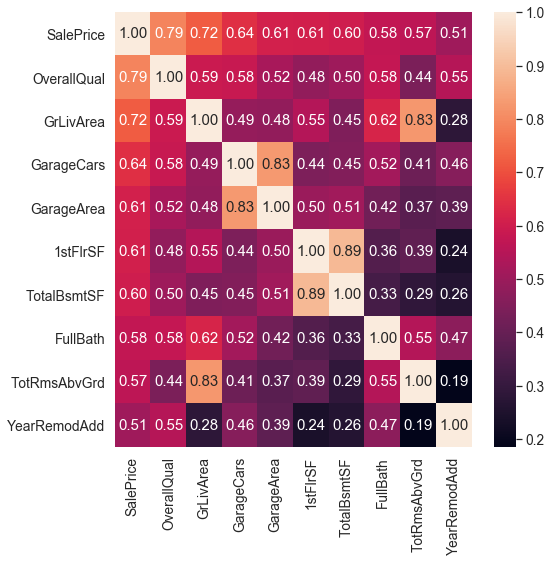

5. Пожалуйста, стандартизируйте столбцы ```"important"``` и ```"SalePrice"``` в наборе обучающих данных ```splitted_data["train"]``` с помощью библиотеки ```sklearn```.

In [6]:
#Начало вашего кода    
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler()
sc_y = StandardScaler()
sc_x.fit(splitted_data['train'][important].values)
splitted_data['train'][important] = sc_x.transform(splitted_data['train'][important].values)
sc_y.fit(splitted_data['train']['SalePrice'].values.reshape(-1,1))
splitted_data['train']['SalePrice'] = sc_y.transform(splitted_data['train']['SalePrice'].values.reshape(-1,1))
#Конец вашего кода

print(sc_x)
print(sc_y)

splitted_data["train"][important].head()

StandardScaler()
StandardScaler()


,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearRemodAdd
355,2.851966,1.550877,1.774787,1.815790,1.474137,1.452740,0.785316,1.566762,1.088726
1316,-0.173379,0.001533,0.200105,-0.220751,0.939694,0.550373,-1.057804,0.290023,0.940397
133,-0.929716,-1.288613,-1.374577,-1.716336,-0.786165,-0.951088,-1.057804,-0.986716,0.347085
181,-0.173379,-0.501273,0.200105,-0.162413,0.267079,0.244612,0.785316,-0.348346,-0.443999
1133,1.339293,-0.101757,0.200105,-0.167716,0.801521,0.940653,0.785316,-0.348346,0.989840


### Ожидаемые результаты:

```python
StandardScaler()
StandardScaler()
```

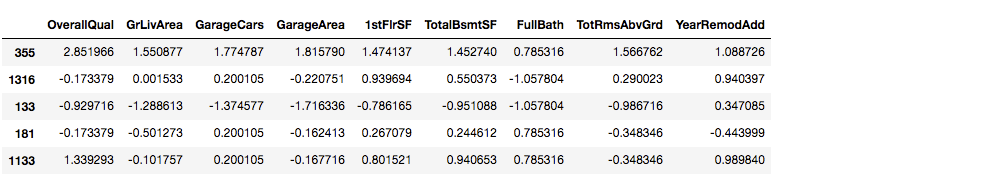

In [7]:
splitted_data["train"]["SalePrice"].head()

355     3.066484
1316   -0.173669
133    -1.060854
181    -0.205813
1133    1.007958
Name: SalePrice, dtype: float64

### Ожидаемые результаты:

```python
355     3.066484
1316   -0.173669
133    -1.060854
181    -0.205813
1133    1.007958
Name: SalePrice, dtype: float64
```

6. Реализуйте функцию ```support_vector_regression(data, parameters, target, kernel="linear", degree=3, epsilon=0.1)```, которая будет обучать метод опорных векторов с использованием уже стандартизированных ```data``` и ```target```с возможностью выбора ядра функции (kernel). Функция должна возвращать словарь с обученным регрессором, списком ```parameters```.

In [8]:
#Начало вашего кода
def support_vector_regression(data, parameters, target, kernel="linear", degree=3, epsilon=0.1):
    from sklearn.svm import SVR
    regressor = SVR(kernel = kernel, degree = degree, epsilon = epsilon)
    regressor.fit(data[parameters].values, data[target].values)
    res = {}
    res['regressor'] = regressor
    res['parameters'] = data[parameters].columns
    return res
#Конец вашего кода

model = support_vector_regression(splitted_data["train"],important,"SalePrice",epsilon=0.1)
print(model)

{'regressor': SVR(kernel='linear'), 'parameters': Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd'],
      dtype='object')}


### Ожидаемые результаты:

```python
{'regressor': SVR(kernel='linear'), 'parameters': Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd'],
      dtype='object')}
```

7. Пожалуйста, реализуйте функцию ```validation(regressor, data, scaler, target="SalePrice")```, которая будет принимать словарь ```model```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать DataFrame с первым столбцом, который будет истинным "SalePrice", а второй столбец предсказан методом опорных векторов и rmse.

In [9]:
#Начало вашего кода
def validation(regressor, data, scaler, target="SalePrice"):
    def rmse(y_true, y_pred):
        rmse = (np.mean((y_true - y_pred)**2)) **0.5
        return rmse
    pred = regressor['regressor'].predict(data[regressor['parameters']].values)
    predict = pred
    predict = scaler.inverse_transform(pred)
    data[target] = scaler.inverse_transform(data[target])
    df = pd.DataFrame()
    df['True Sale Price'] = data[target]
    df['Predicted Sale Price'] = predict
    r = rmse(data[target], predict)
    return df, r 
#Конец вашего кода

8. Постройте модели с ```"linear"```, ```"rbf"``` ядрами и  выполните визуализацию прогнозируемого и истинного ```"SalePrice"``` для каждой модели используя ```"validation"``` данные.

**Примечание:** figsize=(8,8)

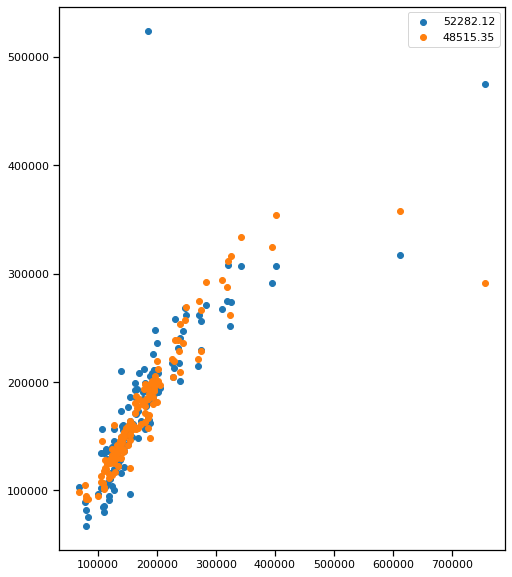

In [15]:
#Начало вашего кода

sc_x_val = StandardScaler()
sc_y_val = StandardScaler()
sc_x_val.fit(splitted_data['validation'][important].values)
splitted_data['validation'][important] = sc_x_val.transform(splitted_data['validation'][important].values)
sc_y_val.fit(splitted_data['validation']['SalePrice'].values.reshape(-1,1))
splitted_data['validation']['SalePrice'] = sc_y_val.transform(splitted_data['validation']['SalePrice'].values.reshape(-1,1))


model_val = support_vector_regression(data = splitted_data["validation"], parameters = important,target = "SalePrice",epsilon=0.1)
val_df = validation(model_val,splitted_data["validation"] ,scaler = sc_y_val,  target="SalePrice")
plt.figure(figsize = (8,10))
sns.set_context('notebook')

plt.scatter(x = val_df[0]['True Sale Price'] , y  = val_df[0]['Predicted Sale Price'], label = round(val_df[1], 2));


sc_x_val = StandardScaler()
sc_y_val = StandardScaler()
sc_x_val.fit(splitted_data['validation'][important].values)
splitted_data['validation'][important] = sc_x_val.transform(splitted_data['validation'][important].values)
sc_y_val.fit(splitted_data['validation']['SalePrice'].values.reshape(-1,1))
splitted_data['validation']['SalePrice'] = sc_y_val.transform(splitted_data['validation']['SalePrice'].values.reshape(-1,1))


model_val = support_vector_regression(data = splitted_data["validation"], parameters = important,target = "SalePrice",kernel="rbf", epsilon=0.1)
val_df = validation(model_val,splitted_data["validation"] ,scaler = sc_y_val,  target="SalePrice")
sns.set_context('notebook')
plt.scatter(x = val_df[0]['True Sale Price'] , y  = val_df[0]['Predicted Sale Price'], label = round(val_df[1], 2));



plt.legend();
#Конец вашего кода

### Ожидаемые результаты:

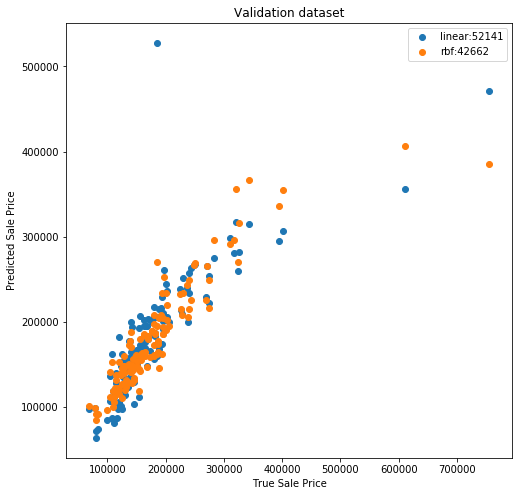

9. Постройте модели с ```"poly"``` ядром в степенях от 2 и 3 и  выполните визуализацию прогнозируемого и истинного ```"SalePrice"``` для каждой модели используя ```"validation"``` данные.

**Примечание:** figsize=(8,8)

In [11]:
#Начало вашего кода

#Конец вашего кода

Ожидаемые результаты:

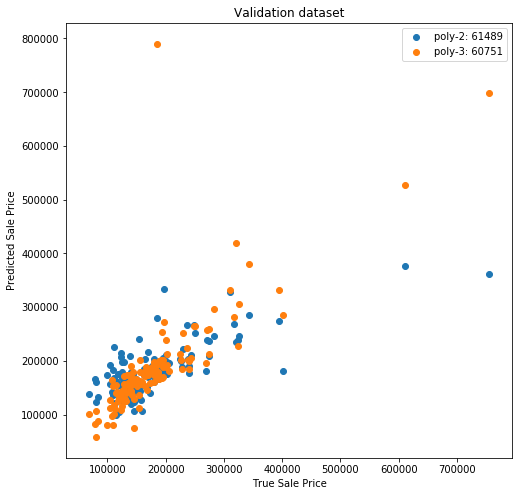

10. Теперь проверьте различные комбинации параметров, используемых для обучения регрессоров, основанного на методе опорных векторов?

In [12]:
#Начало вашего кода

#Конец вашего кода

11. Сравните модели основанных на методе опорных векторов ```"poly"``` с моделями множественной полиномиальной линейной регрессии обученных на ```splitted_data["train"]``` с одинаковыми степенями. Графики сравнения могут быть такими же, как в задачах 8 и 9.

In [13]:
#Начало вашего кода

#Конец вашего кода

### Отличная работа